In [1]:
import datetime
import numpy as np
import pandas as pd

import sys
sys.path.append('C:\\project\\code')
import setting


In [ ]:
import cleandata_2

# 0. Prepare monthly data

In [ ]:
import prepare_data
data = pd.read_hdf('../input/full_data_0218_washed.h5', key='data')
print('Done reading h5...')

daily_return, monthly_return = prepare_data.main_total_vol(data, path='../input/from_prepare_data/')

In [ ]:
del daily_return, monthly_return

# 1. Create and save investable univesre

In [ ]:
cleandata_2.create_invest_universe(setting.datapath+'full_data_0218_washed.h5',
                           setting.datapath+'investable_universe_test.npy',
                           datetime.datetime(1962, 1, 1),
                           datetime.datetime(2001, 1, 1))

# 2. Create portfolio weights

In [ ]:
import form_portfolio

## 2.1 Vol from Monthly
### 2.1.1 Total Vol

In [47]:
file_list = ['M_VOL', 'L_VOL_12M', 'L_VOL_18M', 'L_VOL_24M', 'L_VOL_36M', 'MKTCAP_M']
list_execute = [['M_VOL_lag'], 
                ['L_VOL_12M_lag_lag'], ['L_VOL_18M_lag_lag'], ['L_VOL_24M_lag_lag'], ['L_VOL_36M_lag_lag'],
                ['M_VOL_lag', 'L_VOL_12M_lag_lag'],
                ['M_VOL_lag', 'L_VOL_18M_lag_lag'],
                ['M_VOL_lag', 'L_VOL_24M_lag_lag'],
                ['M_VOL_lag', 'L_VOL_36M_lag_lag']
                ]
date_list = [datetime.datetime(1965, 2, 1), datetime.datetime(2016, 12, 31)]

for nyse_break in [True, False]:
    form_portfolio.form_portfolio(files=file_list, investable_universe_npy='investable_universe_0221.npy',
                              nyse_permno_xlsx='NYSE PERMNO.xlsx', list_execute=list_execute,
                              nyse_break=nyse_break, startdate=date_list[0], enddate=date_list[1])

Portfolio formed for _M_VOL_lag
Portfolio formed for _L_VOL_12M_lag_lag
Portfolio formed for _L_VOL_18M_lag_lag
Portfolio formed for _L_VOL_24M_lag_lag
Portfolio formed for _L_VOL_36M_lag_lag
Portfolio formed for _M_VOL_lag_L_VOL_12M_lag_lag
Portfolio formed for _M_VOL_lag_L_VOL_18M_lag_lag
Portfolio formed for _M_VOL_lag_L_VOL_24M_lag_lag
Portfolio formed for _M_VOL_lag_L_VOL_36M_lag_lag
Portfolio formed for _M_VOL_lag
Portfolio formed for _L_VOL_12M_lag_lag
Portfolio formed for _L_VOL_18M_lag_lag
Portfolio formed for _L_VOL_24M_lag_lag
Portfolio formed for _L_VOL_36M_lag_lag
Portfolio formed for _M_VOL_lag_L_VOL_12M_lag_lag
Portfolio formed for _M_VOL_lag_L_VOL_18M_lag_lag
Portfolio formed for _M_VOL_lag_L_VOL_24M_lag_lag
Portfolio formed for _M_VOL_lag_L_VOL_36M_lag_lag


### 2.1.2 Idio Vol

In [16]:
file_list = ['FF_M_VOL', 'FF_L_VOL_12M', 'FF_L_VOL_18M', 'FF_L_VOL_24M', 'FF_L_VOL_36M', 'MKTCAP_M']
list_execute = [['FF_M_VOL_lag'], 
                ['FF_L_VOL_12M_lag_lag'], ['FF_L_VOL_18M_lag_lag'], ['FF_L_VOL_24M_lag_lag'], ['FF_L_VOL_36M_lag_lag'],
                ['FF_M_VOL_lag', 'FF_L_VOL_12M_lag_lag'],
                ['FF_M_VOL_lag', 'FF_L_VOL_18M_lag_lag'],
                ['FF_M_VOL_lag', 'FF_L_VOL_24M_lag_lag'],
                ['FF_M_VOL_lag', 'FF_L_VOL_36M_lag_lag']
                ]
date_list = [datetime.datetime(1965, 2, 1), datetime.datetime(2016, 12, 31)]

for nyse_break in [True, False]:
    form_portfolio.form_portfolio(files=file_list, investable_universe_npy='investable_universe_0221.npy',
                              nyse_permno_xlsx='NYSE PERMNO.xlsx', list_execute=list_execute,
                              nyse_break=nyse_break, startdate=date_list[0], enddate=date_list[1])

Portfolio formed for _FF_M_VOL_lag
Portfolio formed for _FF_L_VOL_12M_lag_lag
Portfolio formed for _FF_L_VOL_18M_lag_lag
Portfolio formed for _FF_L_VOL_24M_lag_lag
Portfolio formed for _FF_L_VOL_36M_lag_lag
Portfolio formed for _FF_M_VOL_lag_FF_L_VOL_12M_lag_lag
Portfolio formed for _FF_M_VOL_lag_FF_L_VOL_18M_lag_lag
Portfolio formed for _FF_M_VOL_lag_FF_L_VOL_24M_lag_lag
Portfolio formed for _FF_M_VOL_lag_FF_L_VOL_36M_lag_lag
Portfolio formed for _FF_M_VOL_lag
Portfolio formed for _FF_L_VOL_12M_lag_lag
Portfolio formed for _FF_L_VOL_18M_lag_lag
Portfolio formed for _FF_L_VOL_24M_lag_lag
Portfolio formed for _FF_L_VOL_36M_lag_lag
Portfolio formed for _FF_M_VOL_lag_FF_L_VOL_12M_lag_lag
Portfolio formed for _FF_M_VOL_lag_FF_L_VOL_18M_lag_lag
Portfolio formed for _FF_M_VOL_lag_FF_L_VOL_24M_lag_lag
Portfolio formed for _FF_M_VOL_lag_FF_L_VOL_36M_lag_lag


In [31]:
test1 = pd.read_csv('../input/from_prepare_data/FF_L_VOL_24M.csv')
test2 = pd.read_csv('../input/from_prepare_data/L_VOL_24M.csv')

In [32]:
len(test1['PERMNO'].unique()) - len(test2['PERMNO'].unique())

2440

In [35]:
more_stk = set(test1['PERMNO']).difference(set(test2['PERMNO']))

In [37]:
more_stk = list(more_stk)

In [44]:
x = 0.0
for i in range(len(more_stk)):
    x += test1.ix[test1['PERMNO'] == more_stk[i]].shape[0]
    
print(x/len(more_stk))

20.26764585883313


In [39]:
more_stk[0]

49155

22234

In [ ]:
# origianl short selling measures

In [39]:
# # file_list = ['M_VOL', 'L_VOL_12M', 'MKTCAP_M', 'DS_ratio', 'UtilisationByQuantity']
# # list_execute = [['M_VOL_lag'], ['L_VOL_12M_lag'], ['M_VOL_lag', 'L_VOL_12M_lag'],
# #                 ['M_VOL_lag', 'DS_ratio_lag'],  ['M_VOL_lag', 'UtilisationByQuantity_lag']]

# file_list = ['M_VOL', 'L_VOL_24W', 'FF_M_VOL', 'FF_L_VOL_24W', 'MKTCAP_M', 'DS_ratio', 'UtilisationByQuantity']

# list_execute = [
# #     ['M_VOL_lag'], 
#      ['M_VOL_lag', 'L_VOL_24W_lag_lag'],
#                 ['FF_M_VOL_lag'],
#                 ['FF_M_VOL_lag', 'FF_L_VOL_24W_lag_lag'],
# #                 ['M_VOL_lag', 'DS_ratio_lag'],  ['M_VOL_lag', 'UtilisationByQuantity_lag'],
#                 ['FF_M_VOL_lag', 'DS_ratio_lag'],  ['FF_M_VOL_lag', 'UtilisationByQuantity_lag']]

# date_list = [datetime.datetime(2004, 6, 1), datetime.datetime(2016, 12, 31)]

# for nyse_break in [True, False]:
#     form_portfolio.form_portfolio(files=file_list, investable_universe_npy='investable_universe_0221.npy',
#                               nyse_permno_xlsx='NYSE PERMNO.xlsx', list_execute=list_execute,
#                               nyse_break=nyse_break, startdate=date_list[0], enddate=date_list[1])

Portfolio formed for _M_VOL_lag_L_VOL_24W_lag_lag
Portfolio formed for _FF_M_VOL_lag
Portfolio formed for _FF_M_VOL_lag_FF_L_VOL_24W_lag_lag
Portfolio formed for _FF_M_VOL_lag_DS_ratio_lag
Portfolio formed for _FF_M_VOL_lag_UtilisationByQuantity_lag
Portfolio formed for _M_VOL_lag_L_VOL_24W_lag_lag
Portfolio formed for _FF_M_VOL_lag
Portfolio formed for _FF_M_VOL_lag_FF_L_VOL_24W_lag_lag
Portfolio formed for _FF_M_VOL_lag_DS_ratio_lag
Portfolio formed for _FF_M_VOL_lag_UtilisationByQuantity_lag


## 2.2 Vol from Weekly return 
### 2.2.1 total Vol

In [4]:
file_list = ['M_VOL', 'L_VOL_24W', 'L_VOL_48W', 'L_VOL_72W', 'MKTCAP_M']
list_execute = [['M_VOL_lag'], 
                ['L_VOL_24W_lag_lag'], ['L_VOL_48W_lag_lag'], ['L_VOL_72W_lag_lag'], 
                ['M_VOL_lag', 'L_VOL_24W_lag_lag'],
                ['M_VOL_lag', 'L_VOL_48W_lag_lag'],
                ['M_VOL_lag', 'L_VOL_72W_lag_lag']]
date_list = [datetime.datetime(1963, 7, 1), datetime.datetime(2016, 12, 31)]

for nyse_break in [True, False]:
    form_portfolio.form_portfolio(files=file_list, investable_universe_npy='investable_universe_0221.npy',
                              nyse_permno_xlsx='NYSE PERMNO.xlsx', list_execute=list_execute,
                              nyse_break=nyse_break, startdate=date_list[0], enddate=date_list[1])

Portfolio formed for _M_VOL_lag
Portfolio formed for _L_VOL_24W_lag_lag
Portfolio formed for _L_VOL_48W_lag_lag
Portfolio formed for _L_VOL_72W_lag_lag
Portfolio formed for _M_VOL_lag_L_VOL_24W_lag_lag
Portfolio formed for _M_VOL_lag_L_VOL_48W_lag_lag
Portfolio formed for _M_VOL_lag_L_VOL_72W_lag_lag
Portfolio formed for _M_VOL_lag
Portfolio formed for _L_VOL_24W_lag_lag
Portfolio formed for _L_VOL_48W_lag_lag
Portfolio formed for _L_VOL_72W_lag_lag
Portfolio formed for _M_VOL_lag_L_VOL_24W_lag_lag
Portfolio formed for _M_VOL_lag_L_VOL_48W_lag_lag
Portfolio formed for _M_VOL_lag_L_VOL_72W_lag_lag


### 2.2.2 Idio Vol

In [5]:
file_list = ['FF_M_VOL', 'FF_L_VOL_24W', 'FF_L_VOL_48W', 'FF_L_VOL_72W','MKTCAP_M']
list_execute = [['FF_M_VOL_lag'], 
                ['FF_L_VOL_24W_lag_lag'],
                ['FF_L_VOL_48W_lag_lag'],
                ['FF_L_VOL_72W_lag_lag'],
                ['FF_M_VOL_lag', 'FF_L_VOL_24W_lag_lag'],
                ['FF_M_VOL_lag', 'FF_L_VOL_48W_lag_lag'],
                ['FF_M_VOL_lag', 'FF_L_VOL_72W_lag_lag']
                ]
date_list = [datetime.datetime(1963, 7, 1), datetime.datetime(2016, 12, 31)]

for nyse_break in [True, False]:
    form_portfolio.form_portfolio(files=file_list, investable_universe_npy='investable_universe_0221.npy',
                              nyse_permno_xlsx='NYSE PERMNO.xlsx', list_execute=list_execute,
                              nyse_break=nyse_break, startdate=date_list[0], enddate=date_list[1])

Portfolio formed for _FF_M_VOL_lag
Portfolio formed for _FF_L_VOL_24W_lag_lag
Portfolio formed for _FF_L_VOL_48W_lag_lag
Portfolio formed for _FF_L_VOL_72W_lag_lag
Portfolio formed for _FF_M_VOL_lag_FF_L_VOL_24W_lag_lag
Portfolio formed for _FF_M_VOL_lag_FF_L_VOL_48W_lag_lag
Portfolio formed for _FF_M_VOL_lag_FF_L_VOL_72W_lag_lag
Portfolio formed for _FF_M_VOL_lag
Portfolio formed for _FF_L_VOL_24W_lag_lag
Portfolio formed for _FF_L_VOL_48W_lag_lag
Portfolio formed for _FF_L_VOL_72W_lag_lag
Portfolio formed for _FF_M_VOL_lag_FF_L_VOL_24W_lag_lag
Portfolio formed for _FF_M_VOL_lag_FF_L_VOL_48W_lag_lag
Portfolio formed for _FF_M_VOL_lag_FF_L_VOL_72W_lag_lag


## 2.3 Vol and Other Factors
### 2.3.1 With Indicative Fee

In [20]:
file_list = ['M_VOL', 'FF_M_VOL', 'IndicativeFee' , 'MKTCAP_M']
list_execute = [['M_VOL_lag'], ['FF_M_VOL_lag'], ['IndicativeFee'],
                ['M_VOL_lag', 'IndicativeFee_lag'],
                ['FF_M_VOL_lag', 'IndicativeFee_lag']
                ]

date_list = [datetime.datetime(2004, 1, 1), datetime.datetime(2016, 12, 31)]

for nyse_break in [True, False]:
    form_portfolio.form_portfolio(files=file_list, investable_universe_npy='investable_universe_0221.npy',
                              nyse_permno_xlsx='NYSE PERMNO.xlsx', list_execute=list_execute,
                              nyse_break=nyse_break, startdate=date_list[0], enddate=date_list[1])

Portfolio formed for _FF_M_VOL_lag
Portfolio formed for _FF_M_VOL_lag


### 2.3.2 With Size and Momentum

In [21]:
file_list = ['M_VOL', 'FF_M_VOL', 'M_RET', 'MKTCAP_M']
list_execute = [['M_VOL_lag'], ['FF_M_VOL_lag'], ['MKTCAP_M_lag'], ['M_RET_lag'],
                ['M_VOL_lag', 'MKTCAP_M_lag'],
                ['FF_M_VOL_lag', 'MKTCAP_M_lag'],
                ['M_VOL_lag', 'M_RET_lag'],
                ['FF_M_VOL_lag', 'M_RET_lag'],
                ]

date_list = [datetime.datetime(1963, 7, 1), datetime.datetime(2016, 12, 31)]

for nyse_break in [True, False]:
    form_portfolio.form_portfolio(files=file_list, investable_universe_npy='investable_universe_0221.npy',
                              nyse_permno_xlsx='NYSE PERMNO.xlsx', list_execute=list_execute,
                              nyse_break=nyse_break, startdate=date_list[0], enddate=date_list[1])

Portfolio formed for _FF_M_VOL_lag
Portfolio formed for _FF_M_VOL_lag


### 2.3.3 With beta

In [22]:
file_list = ['M_VOL', 'FF_M_VOL', 'MKTCAP_M', 'beta']
list_execute = [['M_VOL_lag'], ['FF_M_VOL_lag'], ['beta_lag'],
                ['M_VOL_lag', 'beta_lag'],
                ['FF_M_VOL_lag', 'beta_lag'],
                ]

date_list = [datetime.datetime(1968, 7, 1), datetime.datetime(2016, 12, 31)]

for nyse_break in [True, False]:
    form_portfolio.form_portfolio(files=file_list, investable_universe_npy='investable_universe_0221.npy',
                              nyse_permno_xlsx='NYSE PERMNO.xlsx', list_execute=list_execute,
                              nyse_break=nyse_break, startdate=date_list[0], enddate=date_list[1])

Portfolio formed for _FF_M_VOL_lag
Portfolio formed for _FF_M_VOL_lag


# 3. Post-data Analysis
## 3.1 Helper functions

In [12]:
import scipy.stats
import statsmodels.api as sm

def read_in_signal(name):
    """Read in signal from data prepared"""
    m_data = pd.read_csv(setting.datapath_prepared+name+'.csv')
    m_data['date'] = pd.to_datetime(m_data['date'])
#     m_data_pivot =pd.pivot_table(m_data,columns=['PERMNO'],index=['date'],values=[name])
    m_data_pivot =pd.pivot_table(m_data,columns='PERMNO',index='date',values=name)
    return m_data_pivot


def select_range(m_data, start, end):
    idx = (m_data.index >= start) & (m_data.index < end)
    return m_data.ix[idx]


def analyze_ret(return_series, average_cap_pct, signal_series_list, signal_names):
    n = return_series.shape[1]
    
    amean_ret = return_series.mean()*100
    gmean_ret = pd.Series((scipy.stats.mstats.gmean(np.array(1.0+return_series.values, 
                                                             dtype=float), axis=0)-1.0)*100,
                          index=np.arange(n)+1)
    
    ret_std = np.std(return_series, axis=0)
    
    pf_info_list = []
    if signal_series_list is not None:
        for i in range(len(signal_series_list)):
            pf_info_list.append(signal_series_list[i].mean())
    
    info_summary = [amean_ret, gmean_ret, ret_std, average_cap_pct] + pf_info_list
    info_summary = pd.concat(info_summary, axis=1)
    info_summary.columns = ['Mthly Arithmetic Mean Ret%', 'Mthly Geometric Mean Ret',
                            'Std of Ret', 'Market Cap%']+signal_names
    info_summary = info_summary.round(decimals=3)
    
    return info_summary


def mean_t_stat(tseries, maxlag=20):
    """
    http://statsmodels.sourceforge.net/devel/stats.html
    Return:
        [parameter, Newey West t-stat]
    """
    model = sm.OLS(np.array(tseries, dtype=float), np.ones(len(tseries)))
    result = model.fit(cov_type='HAC',cov_kwds={'maxlags':maxlag})
    nw_t_value = result.tvalues[0]
    # or 
    # nw_t_value = result.params/np.sqrt(sm.stats.sandwich_covariance.cov_hac(result, nlags=maxlag))[0]
    
    return [result.params[0], result.tvalues[0]]
    

def alpha_test(tseries, ff, minusRF, ffalpha=True, maxlag=12):
    """Calculate the alpha of a series of monthly return
    Args:
        tseries(pd.Series): index is PeriodIndex with freq='M', 
            value is the return (2.3% would be 0.023)
        ff(pd.DataFrame): the fama french 3 factor dataframe
        ffalpha(bool): True-run ff3 regression, False-run CAMP regression
        maxlag(int): the maximum length to calculate the 
            Newey-West standard error
    Return:
        [alpha value, alpha Newey-West t-stat]
    """
    joined_data = pd.concat([tseries, ff], axis=1, join='inner')
    joined_data.columns = ['RET', 'MKT_RF', 'SMB', 'HML', 'RF']
    if minusRF:
        joined_data['ERET'] = joined_data['RET'] - joined_data['RF']
    else:
        joined_data['ERET'] = joined_data['RET']
        
    joined_data['CONST'] = 1.0
    if ffalpha:
        model = sm.OLS(joined_data['ERET'].values, 
                       joined_data[['CONST', 'MKT_RF', 'SMB', 'HML']].values)
    else:
        model = sm.OLS(joined_data['ERET'].values, 
                       joined_data[['CONST', 'MKT_RF']].values)
        
    result = model.fit(cov_type='HAC',cov_kwds={'maxlags':maxlag})
    return [result.params[0], result.tvalues[0]]

## 3.2 Main analysis class

In [7]:
from portfolio_analysis import  review_pf_return, review_pf_signal
import io_tool
import dateutil
import turnover

In [17]:
class post_data_analysis:
    def __init__(self, pfweight_file):
        """Initialize the data needed"""
        self.pfweight_file = pfweight_file
        self.pfweight = io_tool.load_pickle_obj(setting.datapath_pf_weight, self.pfweight_file)
        
        self.cap_pivot=read_in_signal('MKTCAP_M')
        self.return_pivot=read_in_signal('M_RET')
        
        ff_mthly = pd.read_csv('../input/famafrench_mthly.CSV')
        ff_mthly['date'] = pd.to_datetime(ff_mthly['date'], format='%Y%m')
        ff_mthly.set_index('date', inplace=True)
        ff_mthly.columns = ['MKT_RF', 'SMB', 'HML', 'RF']
        ff_mthly = ff_mthly.to_period('M')
        self.ff_mthly = ff_mthly/100.0
        self.prepare_data()
    
    def prepare_data(self):
        pf_start = np.min(list(self.pfweight.keys()))
        pf_end = np.max(list(self.pfweight.keys())) + dateutil.relativedelta.relativedelta(months=1)
        
        self.cap_series=review_pf_signal(pf_start,pf_end, self.pfweight, self.cap_pivot)
        self.return_series=review_pf_return(pf_start, pf_end, self.pfweight, self.return_pivot)
        
    def update_pfweight(self, pfweight_file):
        self.pfweight_file = pfweight_file
        self.pfweight = io_tool.load_pickle_obj(setting.datapath_pf_weight, pfweight_file)
        self.prepare_data()
        
    def get_summary1(self, start, end):
        
        m_cap_series = select_range(self.cap_series, start, end)
        m_return_series = select_range(self.return_series, start, end)
        
        average_cap_pct = m_cap_series.mean()/np.sum(m_cap_series.mean())
        
        num_port = m_return_series.shape[1]
        # summary table 
        table1 = analyze_ret(m_return_series, average_cap_pct, [m_cap_series], ['Mkt Cap Mean'])
        # long short port mean ret
        table2 = pd.DataFrame(mean_t_stat(m_return_series[num_port].values-m_return_series[1].values), 
                              index=['mean', 't-stat'], columns=[str(num_port)+'-1'])
        
        # alpha table
        alpha_results = np.zeros((num_port+1, 4))
        for i in range(num_port):
            alpha_results[i,:2] = alpha_test(m_return_series[i+1], self.ff_mthly, minusRF=True, ffalpha=False)
            alpha_results[i,2:] = alpha_test(m_return_series[i+1], self.ff_mthly, minusRF=True, ffalpha=True)

        alpha_results[-1, :2] = alpha_test(m_return_series[num_port]-m_return_series[1],
                                           self.ff_mthly, minusRF=False, ffalpha=False)
        alpha_results[-1, 2:] = alpha_test(m_return_series[num_port]-m_return_series[1],
                                           self.ff_mthly, minusRF=False, ffalpha=True)
        
        alpha_results[:, (0, 2)] = alpha_results[:, (0, 2)] * 100
        
        table3 = pd.DataFrame(alpha_results, index=list(np.arange(1, num_port+1))+[str(num_port)+'-1'], 
                                     columns=['CAPM alpha%', 'CAPM t-stat', 'FF3 alpha%', 'FF3 t-stat'])
        
        self.table = [table1, table2, table3]
    
    def get_summary2(self,name1, name2, start, end):
        m_cap_series = select_range(self.cap_series, start, end)
        m_return_series = select_range(self.return_series, start, end)
        num_port = m_return_series.shape[1]
        # this summary is designed for 25 portfolios
        assert num_port == 25
        
        alpha_coef = np.zeros((6, 6))
        alpha_t = np.zeros((6, 6))
        # loop throgh the first signal group
        for i in range(5):
            # loop throgh the second signal group
            for j in range(5):
                alpha_coef[j, i], alpha_t[j, i] = alpha_test(m_return_series[5*i+j+1],
                                                                          self.ff_mthly, minusRF=True, ffalpha=True)
            # given the first signal, second signal 5-1
            alpha_coef[5, i], alpha_t[5, i] = alpha_test(m_return_series[5*i+5]-m_return_series[5*i+1],
                                                        self.ff_mthly, minusRF=False, ffalpha=True)
        
        # given the second signal, the first signal 5-1
        for j in range(5):
            alpha_coef[j, 5], alpha_t[j, 5] = alpha_test(m_return_series[20+j+1]-m_return_series[j+1],
                                                        self.ff_mthly, minusRF=False, ffalpha=True)
            
            
        column_name = [ name1+str(x+1) for x in range(5)] + [name1+'(5-1)']
        index_name = [ name2+str(x+1) for x in range(5)] + [name2+'(5-1)']
        
        alpha_coef = pd.DataFrame(alpha_coef*100, index=index_name, columns=column_name)
        alpha_coef.index.name = 'Fama French alpha%'
        alpha_t = pd.DataFrame(alpha_t, index=index_name, columns=column_name)
        alpha_t.index.name = 'alpha t-stat'
        
        self.table2 = [alpha_coef, alpha_t]
                

## 3.3 Helper functions for aggregating output

In [14]:
# Helper functions for aggregate output

def wrapper_25_to_table(data):
    table = np.zeros((5, 5))
    for i in range(5):
        for j in range(5):
            table[j, i] = data[5*i+j]
    return table
    
def get_stk_number(pfweight, start, end):
    current = start
    num_port = len(pfweight[current])
    record_list = []
    while current < end:
        current_weight = pfweight[current]
        temp = np.zeros(num_port)
        for i in range(num_port):
            temp[i] = current_weight[i].shape[0]            
        
        record_list.append(temp)
        current += dateutil.relativedelta.relativedelta(months=1)
    return np.array(record_list)

## 3.4 Output Aggregation and Export to Excel

In [15]:
import xlsxwriter

def aggregate_output(analysis_robot, name_list, m_writer, start, end, nysebreak=False):
    # pre analysis
    if len(name_list) == 1:
        sheetname = name_list[0]+'_'+str(nysebreak)
    else:
        sheetname = name_list[0][:12]+'_'+name_list[1][:12]+'_'+str(nysebreak)
    
#     print('..write to'+sheetname)
    analysis_robot.get_summary1(start, end);
    
    # excel writer initialize
    workbook  = m_writer.book
    
    # analysis
    stk_num_record = get_stk_number(analysis_robot.pfweight, start, end).mean(axis=0)
    port_turnover = turnover.Turnover_rate(analysis_robot.pfweight, start, end).mean(axis=0).values
    
    if len(name_list) == 1:
        group_name = [name_list[0] + str(x+1) for x in range(5)]
        stk_num_df = pd.DataFrame(stk_num_record, index=group_name).round(2)
        stk_num_df.index.name = 'Average Stk Number'
        
        port_turnover_df = pd.DataFrame(port_turnover, index=group_name).round(2)
        port_turnover_df.index.name = 'Pct Stk Change'
        
        stk_num_df.to_excel(m_writer, sheet_name=sheetname)
        port_turnover_df.to_excel(m_writer, sheet_name=sheetname, startcol= stk_num_df.shape[1]+2)
        
        row_record = stk_num_df.shape[0] + 2
        analysis_robot.table[0].to_excel(m_writer, sheet_name=sheetname,
                                         startrow=row_record)
        (analysis_robot.table[2].round(2)).to_excel(m_writer, sheet_name=sheetname,
                                         startrow=row_record, 
                                         startcol=analysis_robot.table[0].shape[1]+2)
        row_record = row_record + analysis_robot.table[0].shape[0] + 2
        analysis_robot.table[1].to_excel(m_writer, sheet_name=sheetname, startrow=row_record)
        worksheet = m_writer.sheets[sheetname]
    else:
        column_name = [name_list[0]+str(x+1) for x in range(5)]
        index_name = [name_list[1]+str(x+1) for x in range(5)]
        
        analysis_robot.get_summary2(name1=name_list[0], name2=name_list[1], start=start, end=end);
        stk_num_df = pd.DataFrame(wrapper_25_to_table(stk_num_record),
                                  index=index_name, columns=column_name).round(2)
        stk_num_df.index.name = 'Average Stk Number'
        
        port_turnover_df = pd.DataFrame(wrapper_25_to_table(port_turnover),
                                  index=index_name, columns=column_name).round(2)
        port_turnover_df.index.name = 'Pct Stk Change'
        
        table_to_write = [stk_num_df]
        
        # wrap table one into 5x5 table
        for i in range(analysis_robot.table[0].shape[1]):
            temp_df = pd.DataFrame(wrapper_25_to_table(analysis_robot.table[0].iloc[:,i].values), 
                        index=index_name, columns=column_name)
            temp_df.index.name = analysis_robot.table[0].columns[i]
            table_to_write.append(temp_df)
        
        # add alpha table
        table_to_write = table_to_write + analysis_robot.table2
        table_to_write.append(port_turnover_df)
        
        row_record = 1
        col_record = 0
        row_record_list = [row_record]
        for i in range(len(table_to_write)):
            item = table_to_write[i].round(3)
            item.to_excel(m_writer, sheet_name=sheetname, 
                                       startrow=row_record, startcol=col_record)
            if i%2==0:
                col_record= 8 #item.shape[1] + 4
            else:
                col_record = 0
                row_record = row_record+item.shape[0]+2
                row_record_list.append(row_record)
        row_record_list.append(row_record+item.shape[0]+1)
    
        worksheet = m_writer.sheets[sheetname]
        for i in range(1, len(row_record_list)):
            worksheet.conditional_format('A'+str(row_record_list[i-1])+':G'+str(row_record_list[i]),
                                                 {'type': '3_color_scale'})
            worksheet.conditional_format('I'+str(row_record_list[i-1])+':P'+str(row_record_list[i]),
                                                 {'type': '3_color_scale'})
    
    # Widen the first column to make the text clearer.
    worksheet.set_column('A:Z', 12)
    
def wrapper_analysis_write(outputname, inputrange, list_execute, startdate, enddate, nyse_break_list):
    """
    :outputname(str): the name of the excel to save data
    :inputrange(str): the string of range of dates, e.g. '2010-01-2015-06'
    :list_execute(list of list of str): the list of the signal names that we examine (at most two signals in one list)
        e.g. [['M_VOL_lag'], ['M_VOL_lag', 'L_VOL_12M_lag']]
    :startdate(datetime.datetime): the date we use to start backtest
    :enddate(datetime.datetime): the date we end backtest
    :nyse_break_list(list of bool): [True, False] or [True] to set whether we use NYSE breakpoints
    """
    writer = pd.ExcelWriter('../output/'+outputname, engine='xlsxwriter')
    workbook = writer.book
    worksheet = workbook.add_worksheet()

    date_format = workbook.add_format({'num_format': 'mm/dd/yy',
                                          'align': 'left'})
    worksheet.write_datetime(1, 1, startdate, date_format)
    worksheet.write_datetime(2, 2, enddate, date_format)

    for nyse_break in nyse_break_list:
        for i in range(len(list_execute)):
            if len(list_execute[i])==1:
                file_name = 'pfweight_'+list_execute[i][0]+'_'+str(nyse_break)+inputrange
            else:
                file_name = 'pfweight_'+list_execute[i][0]+'_'+list_execute[i][1]+'_'+str(nyse_break)+inputrange
            print('Analyze and aggregate: ',file_name)
            analysis_robot=post_data_analysis(file_name)
            names = [x[:-4] for x in list_execute[i]]
            aggregate_output(analysis_robot, names, writer, startdate, enddate, nyse_break)

    writer.save()

# 4. Output Execution
## 4.1 Vol from Monthly 
### 4.1.1 Total Vol

In [ ]:
list_execute = [['M_VOL_lag'], 
                ['L_VOL_12M_lag_lag'], ['L_VOL_18M_lag_lag'], ['L_VOL_24M_lag_lag'], ['L_VOL_36M_lag_lag'],
                ['M_VOL_lag', 'L_VOL_12M_lag_lag'],
                ['M_VOL_lag', 'L_VOL_18M_lag_lag'],
                ['M_VOL_lag', 'L_VOL_24M_lag_lag'],
                ['M_VOL_lag', 'L_VOL_36M_lag_lag']
                ]

startdate = datetime.datetime(1965, 2, 1)
enddate = datetime.datetime(2016, 12, 31)
nyse_break_list = [True, False]
wrapper_analysis_write('analysis_mthly_tot0304.xlsx','1965-02-2016-12', list_execute, startdate, enddate, nyse_break_list)

### 4.1.2 Idio Vol


In [16]:
list_execute = [['FF_M_VOL_lag'], 
                ['FF_L_VOL_12M_lag_lag'], ['FF_L_VOL_18M_lag_lag'], ['FF_L_VOL_24M_lag_lag'], ['FF_L_VOL_36M_lag_lag'],
                ['FF_M_VOL_lag', 'FF_L_VOL_12M_lag_lag'],
                ['FF_M_VOL_lag', 'FF_L_VOL_18M_lag_lag'],
                ['FF_M_VOL_lag', 'FF_L_VOL_24M_lag_lag'],
                ['FF_M_VOL_lag', 'FF_L_VOL_36M_lag_lag']
                ]

startdate = datetime.datetime(1965, 2, 1)
enddate = datetime.datetime(2016, 12, 31)
nyse_break_list = [True, False]
wrapper_analysis_write('analysis_mthly_idio0303.xlsx','1965-02-2016-12', list_execute, startdate, enddate, nyse_break_list)

Analyze and aggregate:  pfweight_FF_M_VOL_lag_True1965-02-2016-12
Analyze and aggregate:  pfweight_FF_L_VOL_12M_lag_lag_True1965-02-2016-12


KeyboardInterrupt: 

## 4.2 Vol from Weekly 
### 4.2.1 Total Vol

In [6]:
list_execute = [['M_VOL_lag'], 
                ['L_VOL_24W_lag_lag'], ['L_VOL_48W_lag_lag'], ['L_VOL_72W_lag_lag'], 
                ['M_VOL_lag', 'L_VOL_24W_lag_lag'],
                ['M_VOL_lag', 'L_VOL_48W_lag_lag'],
                ['M_VOL_lag', 'L_VOL_72W_lag_lag']]

startdate = datetime.datetime(1965, 2, 1)
enddate = datetime.datetime(2016, 12, 31)
nyse_break_list = [True, False]
# We input data from 1963-07 to 2016-12, but calculate the results using 1965-02 to 2016-12
wrapper_analysis_write('analysis_weekly_tot0303.xlsx','1963-07-2016-12', list_execute, startdate, enddate, nyse_break_list)

Analyze and aggregate:  pfweight_M_VOL_lag_True1963-07-2016-12


NameError: name 'post_data_analysis' is not defined

### 4.2.2 Idio Vol

In [11]:
list_execute = [['FF_M_VOL_lag'], 
                ['FF_L_VOL_24W_lag_lag'],
                ['FF_L_VOL_48W_lag_lag'],
                ['FF_L_VOL_72W_lag_lag'],
                ['FF_M_VOL_lag', 'FF_L_VOL_24W_lag_lag'],
                ['FF_M_VOL_lag', 'FF_L_VOL_48W_lag_lag'],
                ['FF_M_VOL_lag', 'FF_L_VOL_72W_lag_lag']
                ]

startdate = datetime.datetime(1965, 2, 1)
enddate = datetime.datetime(2016, 12, 31)
nyse_break_list = [True, False]
wrapper_analysis_write('analysis_weekly_idio0303.xlsx','1963-07-2016-12', list_execute, startdate, enddate, nyse_break_list)

Analyze and aggregate:  pfweight_FF_M_VOL_lag_True1963-07-2016-12


NameError: name 'read_in_signal' is not defined

## 4.3 Vol and Other Factors
### 4.3.1 With Indicative Fee

In [10]:
list_execute = [['M_VOL_lag'], ['FF_M_VOL_lag'], ['IndicativeFee'],
                ['M_VOL_lag', 'IndicativeFee_lag'],
                ['FF_M_VOL_lag', 'IndicativeFee_lag']
                ]

date_list = [datetime.datetime(2004, 1, 1), datetime.datetime(2016, 12, 31)]

nyse_break_list = [True, False]
wrapper_analysis_write('analysis_shortfee0303.xlsx','2004-01-2016-12',
                       list_execute, date_list[0], date_list[1], nyse_break_list)

### 4.3.2 With Size and Momentum

In [12]:
list_execute = [['M_VOL_lag'], ['FF_M_VOL_lag'], ['MKTCAP_M_lag'], ['M_RET_lag'],
                ['M_VOL_lag', 'MKTCAP_M_lag'],
                ['FF_M_VOL_lag', 'MKTCAP_M_lag'],
                ['M_VOL_lag', 'M_RET_lag'],
                ['FF_M_VOL_lag', 'M_RET_lag'],
                ]
date_list = [datetime.datetime(1965, 2, 1), datetime.datetime(2016, 12, 31)]
nyse_break_list = [True, False]
wrapper_analysis_write('analysis_size_mom0303.xlsx','1963-07-2016-12', list_execute, date_list[0], date_list[1], nyse_break_list)

Analyze and aggregate:  pfweight_M_VOL_lag_True1963-07-2016-12
Analyze and aggregate:  pfweight_FF_M_VOL_lag_True1963-07-2016-12
Analyze and aggregate:  pfweight_MKTCAP_M_lag_True1963-07-2016-12
Analyze and aggregate:  pfweight_M_RET_lag_True1963-07-2016-12
Analyze and aggregate:  pfweight_M_VOL_lag_MKTCAP_M_lag_True1963-07-2016-12
skipped1964-05-01 00:00:00on 0th portfolio
skipped1965-09-01 00:00:00on 0th portfolio
skipped1965-10-01 00:00:00on 0th portfolio
skipped1970-07-01 00:00:00on 0th portfolio
skipped1970-12-01 00:00:00on 0th portfolio
skipped1971-02-01 00:00:00on 0th portfolio
skipped1971-03-01 00:00:00on 5th portfolio
skipped1971-05-01 00:00:00on 0th portfolio
skipped1972-07-01 00:00:00on 0th portfolio
skipped1973-09-01 00:00:00on 0th portfolio
skipped1964-05-01 00:00:00on 0th portfolio
skipped1965-09-01 00:00:00on 0th portfolio
skipped1965-10-01 00:00:00on 0th portfolio
skipped1970-07-01 00:00:00on 0th portfolio
skipped1970-12-01 00:00:00on 0th portfolio
skipped1971-02-01 00:

### 4.3.3 With beta

In [ ]:
list_execute = [['M_VOL_lag'], ['FF_M_VOL_lag'], ['beta_lag'],
                ['M_VOL_lag', 'beta_lag'],
                ['FF_M_VOL_lag', 'beta_lag'],
                ]
date_list = [datetime.datetime(1968, 7, 1), datetime.datetime(2016, 12, 31)]
nyse_break_list = [True, False]
wrapper_analysis_write('analysis_beta0303.xlsx','1968-07-2016-12', list_execute, date_list[0], date_list[1], nyse_break_list)

## 4.4  Results after year 2004


# Testing scripts

# 5. Specific Quantile Portfolio Analysis

In [ ]:
% matplotlib inline
import matplotlib.pyplot as plt

def heatmap(df):
    fig, ax = plt.subplots()
    # setting
#     heatmap = ax.pcolor(df, cmap=plt.cm.Blues, alpha=0.8)
    heatmap = ax.pcolor(df, alpha=0.8)

    # turn off the frame
    ax.set_frame_on(False)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(df.shape[0]) + 1, minor=False)
    ax.set_xticks(np.arange(df.shape[1]) + 1, minor=False)

    # want a more natural, table-like display
    ax.invert_yaxis()
    ax.xaxis.tick_top()


    # note I could have used nba_sort.columns but made "labels" instead
    ax.set_xticklabels(df.columns, minor=False)
    ax.set_yticklabels(df.index, minor=False)


In [111]:
analysis_robot = post_data_analysis('pfweight_M_VOL_lag_True1963-07-2016-12')

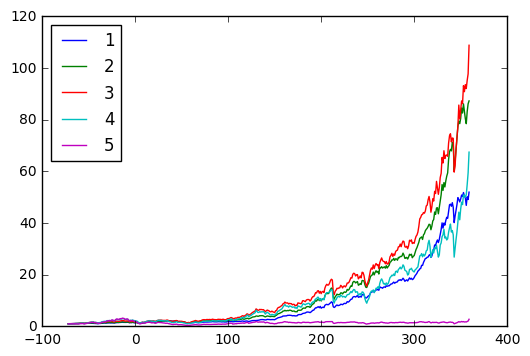

In [120]:
plt.plot(analysis_robot.return_series.cumprod(axis=0))
plt.legend(np.arange(25)+1, loc='best')